In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
# Add one conv layer

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Fourth convolution extracts 128 filters that are 2x2
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 2, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=img_input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [4]:
# Retrain model

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15


/Users/fernandasecinaro/Library/Caches/pypoetry/virtualenvs/image-classifier-2tfNJVpE-py3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-22 23:34:34.488261: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/fernandasecinaro/.pyenv/versions/3.12.5/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 - 3s - 27ms/step - accuracy: 0.2031 - loss: 1.6217 - val_accuracy: 0.2500 - val_loss: 1.3906
Epoch 2/15


2024-09-22 23:34:35.358322: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 17ms/step - accuracy: 0.2500 - loss: 1.3964 - val_accuracy: 0.3750 - val_loss: 1.3888
Epoch 3/15


2024-09-22 23:34:37.104260: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 17ms/step - accuracy: 0.2031 - loss: 1.3974 - val_accuracy: 0.3125 - val_loss: 1.3910
Epoch 4/15
100/100 - 2s - 16ms/step - accuracy: 0.2812 - loss: 1.3816 - val_accuracy: 0.3125 - val_loss: 1.3846
Epoch 5/15


2024-09-22 23:34:40.380853: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 16ms/step - accuracy: 0.2031 - loss: 1.4037 - val_accuracy: 0.2500 - val_loss: 1.3836
Epoch 6/15
100/100 - 2s - 17ms/step - accuracy: 0.2656 - loss: 1.3866 - val_accuracy: 0.2500 - val_loss: 1.3878
Epoch 7/15
100/100 - 2s - 16ms/step - accuracy: 0.2656 - loss: 1.3809 - val_accuracy: 0.1875 - val_loss: 1.3873
Epoch 8/15
100/100 - 2s - 16ms/step - accuracy: 0.2656 - loss: 1.3758 - val_accuracy: 0.2500 - val_loss: 1.3905
Epoch 9/15


2024-09-22 23:34:46.975032: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 16ms/step - accuracy: 0.2344 - loss: 1.3907 - val_accuracy: 0.2500 - val_loss: 1.3936
Epoch 10/15
100/100 - 2s - 16ms/step - accuracy: 0.3125 - loss: 1.3748 - val_accuracy: 0.2500 - val_loss: 1.3950
Epoch 11/15
100/100 - 2s - 18ms/step - accuracy: 0.3281 - loss: 1.3613 - val_accuracy: 0.2500 - val_loss: 1.3989
Epoch 12/15
100/100 - 2s - 16ms/step - accuracy: 0.2500 - loss: 1.3838 - val_accuracy: 0.2500 - val_loss: 1.4049
Epoch 13/15
100/100 - 2s - 16ms/step - accuracy: 0.3125 - loss: 1.3755 - val_accuracy: 0.1875 - val_loss: 1.3868
Epoch 14/15
100/100 - 2s - 16ms/step - accuracy: 0.2969 - loss: 1.3768 - val_accuracy: 0.1875 - val_loss: 1.3832
Epoch 15/15
100/100 - 2s - 16ms/step - accuracy: 0.3125 - loss: 1.3790 - val_accuracy: 0.3125 - val_loss: 1.3809


In [5]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.2500 - loss: 1.3812
[1.3812105655670166, 0.25]
Accuracy: 25.0000%
Loss:  1.3812105655670166


In [6]:
import matplotlib.pyplot as plt

def plot(training_history):
    acc = training_history.history['accuracy'] 
    val_acc = training_history.history['val_accuracy'] 
    loss = training_history.history['loss'] 
    val_loss = training_history.history['val_loss']
    epochs = range(len(acc))


    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

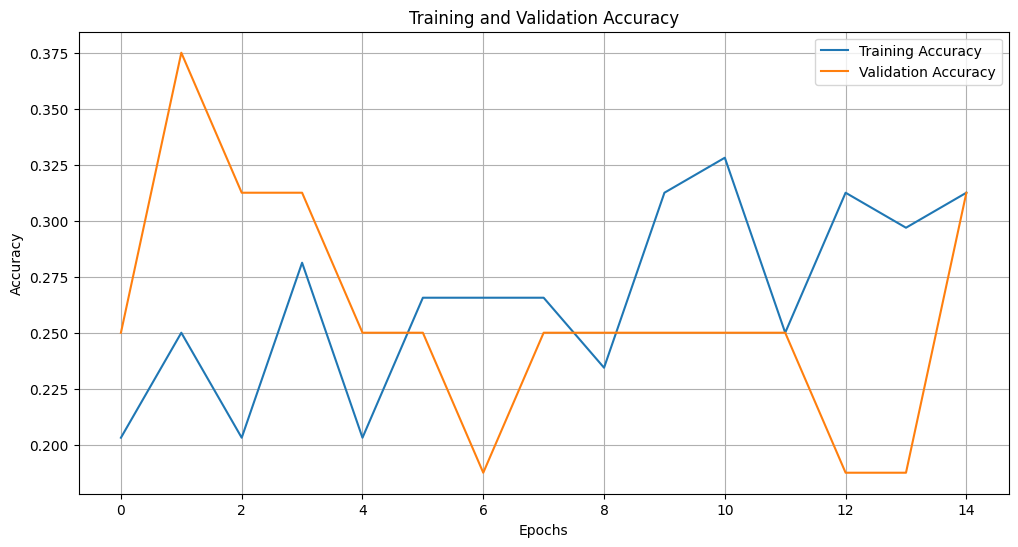

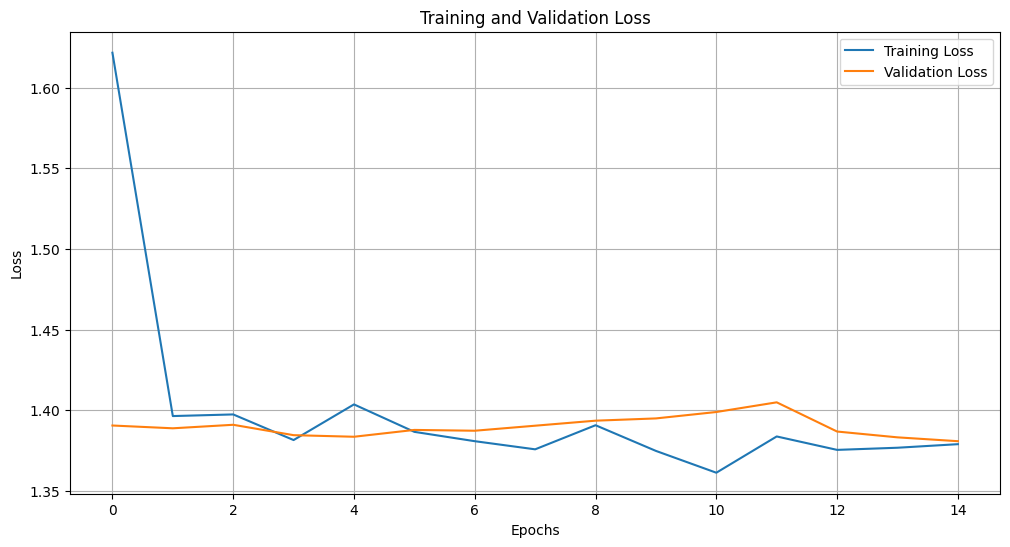

In [7]:
plot(history)

In [12]:
# Add fully connected layers

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

# Create a fully connected layer with ReLU activation and 256 hidden units
x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.5)(x)

# Create a fully connected layer with ReLU activation and 128 hidden units
x = layers.Dense(128, activation='relu')(x)

output = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=img_input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '../../images',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '../../images', 
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [14]:
# Retrain model

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
100/100 - 3s - 32ms/step - accuracy: 0.1250 - loss: 3.6743 - val_accuracy: 0.2500 - val_loss: 1.4765
Epoch 2/15
100/100 - 2s - 21ms/step - accuracy: 0.1875 - loss: 1.5271 - val_accuracy: 0.2500 - val_loss: 1.4086
Epoch 3/15


2024-09-22 23:37:16.552454: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 20ms/step - accuracy: 0.3438 - loss: 1.3843 - val_accuracy: 0.2500 - val_loss: 1.3904
Epoch 4/15
100/100 - 2s - 20ms/step - accuracy: 0.1875 - loss: 1.3974 - val_accuracy: 0.2500 - val_loss: 1.3827
Epoch 5/15
100/100 - 2s - 24ms/step - accuracy: 0.2500 - loss: 1.3927 - val_accuracy: 0.2500 - val_loss: 1.3826
Epoch 6/15
100/100 - 2s - 21ms/step - accuracy: 0.1719 - loss: 1.3820 - val_accuracy: 0.3750 - val_loss: 1.3723
Epoch 7/15
100/100 - 2s - 24ms/step - accuracy: 0.3594 - loss: 1.3636 - val_accuracy: 0.2500 - val_loss: 1.3758
Epoch 8/15
100/100 - 2s - 20ms/step - accuracy: 0.2812 - loss: 1.3498 - val_accuracy: 0.3125 - val_loss: 1.3622
Epoch 9/15
100/100 - 2s - 19ms/step - accuracy: 0.3594 - loss: 1.3362 - val_accuracy: 0.3125 - val_loss: 1.3308
Epoch 10/15
100/100 - 2s - 19ms/step - accuracy: 0.3438 - loss: 1.3054 - val_accuracy: 0.3125 - val_loss: 1.4204
Epoch 11/15
100/100 - 2s - 19ms/step - accuracy: 0.3438 - loss: 1.3228 - val_accuracy: 0.5000 - val_loss: 1.4296
E

In [15]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.2500 - loss: 1.3687
[1.3687307834625244, 0.25]
Accuracy: 25.0000%
Loss:  1.3687307834625244


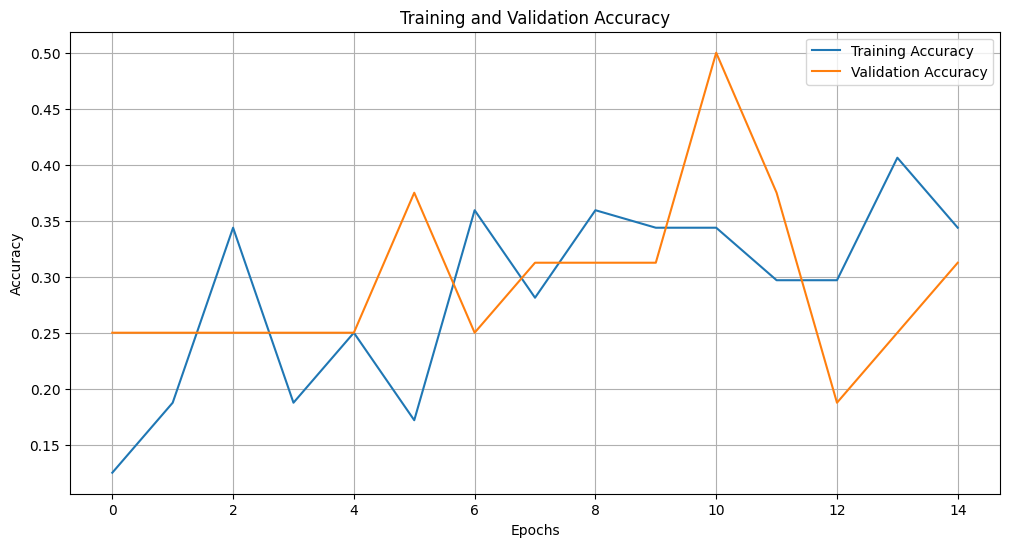

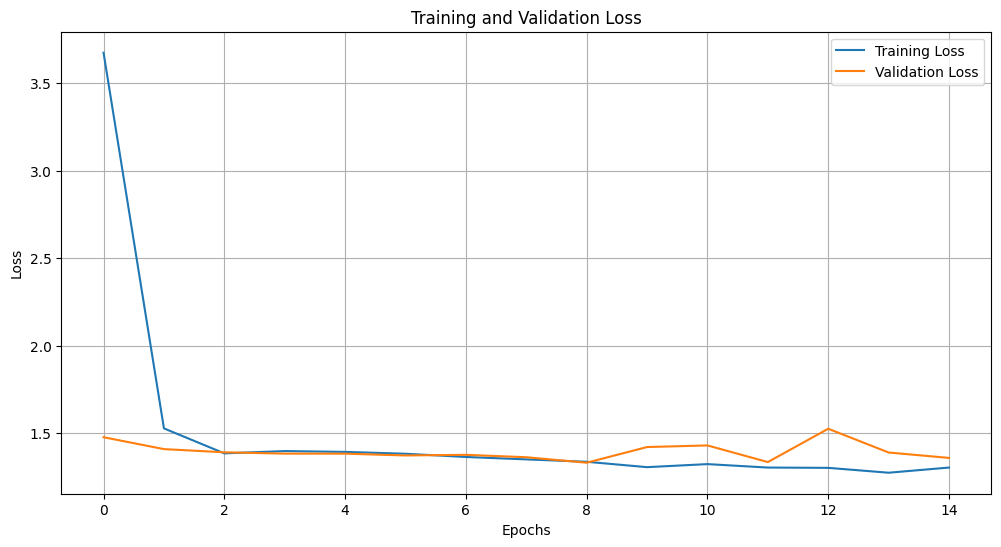

In [16]:
plot(history)

In [17]:
# Retrain model

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
100/100 - 2s - 23ms/step - accuracy: 0.3281 - loss: 1.2938 - val_accuracy: 0.3750 - val_loss: 1.3631
Epoch 2/30
100/100 - 2s - 17ms/step - accuracy: 0.4375 - loss: 1.2548 - val_accuracy: 0.2500 - val_loss: 1.4893
Epoch 3/30
100/100 - 2s - 18ms/step - accuracy: 0.3438 - loss: 1.2124 - val_accuracy: 0.3750 - val_loss: 1.6713
Epoch 4/30
100/100 - 2s - 16ms/step - accuracy: 0.3594 - loss: 1.3316 - val_accuracy: 0.1875 - val_loss: 1.8792
Epoch 5/30
100/100 - 2s - 17ms/step - accuracy: 0.3750 - loss: 1.1328 - val_accuracy: 0.1875 - val_loss: 1.5909
Epoch 6/30
100/100 - 2s - 17ms/step - accuracy: 0.4062 - loss: 1.2254 - val_accuracy: 0.1250 - val_loss: 1.8758
Epoch 7/30
100/100 - 2s - 18ms/step - accuracy: 0.5000 - loss: 1.1741 - val_accuracy: 0.1875 - val_loss: 1.5973
Epoch 8/30
100/100 - 2s - 17ms/step - accuracy: 0.4219 - loss: 1.1589 - val_accuracy: 0.1875 - val_loss: 1.7295
Epoch 9/30
100/100 - 2s - 16ms/step - accuracy: 0.4375 - loss: 1.1699 - val_accuracy: 0.0625 - val_loss:

2024-09-22 23:38:52.588096: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 2s - 18ms/step - accuracy: 0.4531 - loss: 1.0296 - val_accuracy: 0.1250 - val_loss: 1.9661
Epoch 21/30
100/100 - 2s - 18ms/step - accuracy: 0.4844 - loss: 0.9586 - val_accuracy: 0.3750 - val_loss: 2.5324
Epoch 22/30
100/100 - 2s - 18ms/step - accuracy: 0.5938 - loss: 1.0002 - val_accuracy: 0.1875 - val_loss: 2.2369
Epoch 23/30
100/100 - 2s - 20ms/step - accuracy: 0.5156 - loss: 0.9303 - val_accuracy: 0.1875 - val_loss: 1.8472
Epoch 24/30
100/100 - 2s - 18ms/step - accuracy: 0.5312 - loss: 0.9639 - val_accuracy: 0.3125 - val_loss: 2.0136
Epoch 25/30
100/100 - 2s - 21ms/step - accuracy: 0.5938 - loss: 0.8949 - val_accuracy: 0.1250 - val_loss: 1.8867
Epoch 26/30
100/100 - 2s - 20ms/step - accuracy: 0.7031 - loss: 0.7768 - val_accuracy: 0.2500 - val_loss: 2.0211
Epoch 27/30
100/100 - 2s - 21ms/step - accuracy: 0.5469 - loss: 0.9361 - val_accuracy: 0.3125 - val_loss: 2.1646
Epoch 28/30
100/100 - 2s - 20ms/step - accuracy: 0.4688 - loss: 1.1611 - val_accuracy: 0.1875 - val_loss: 1.

In [18]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step - accuracy: 0.2500 - loss: 1.4636
[1.463629126548767, 0.25]
Accuracy: 25.0000%
Loss:  1.463629126548767


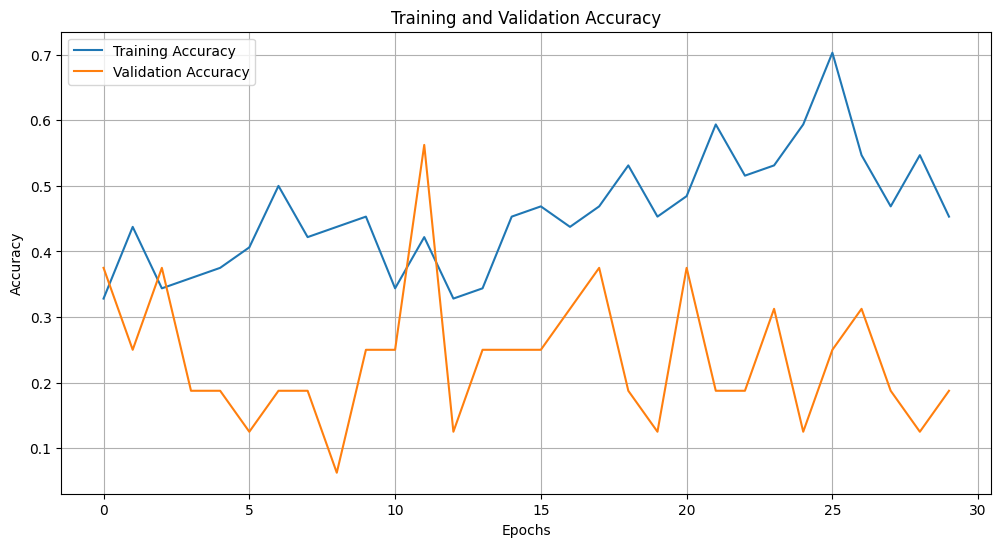

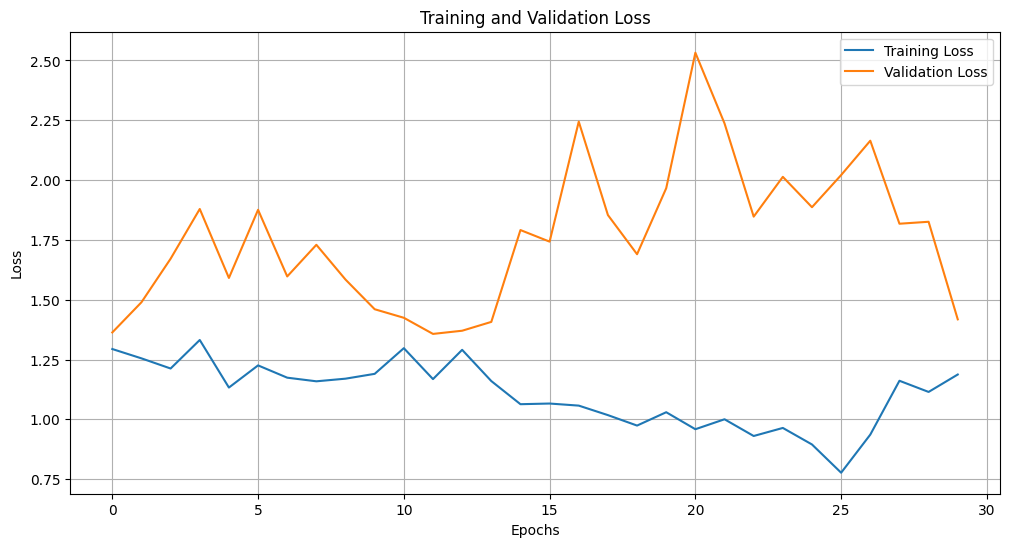

In [19]:
plot(history)